# **THE 25% CLUB : 4 simple Steps**
  
   ![](https://blog.policyexpert.co.uk/wp-content/uploads/2018/01/iStock-653905536.jpg)



                                       "COMPUTERS ARE ABLE TO SEE, HEAR,AND 
                                           LEARN. WELCOME TO THE FUTURE."
                                                             -DAVE WATERS 
>  **NOTE** : *I am a beginner in the field of data science and machine learning and I love to learn new things and teach someone                   who needs it. so here I am this is my first Kaggle notebook if I made a mistake or something in advance I                           apologize for it and feel free to correct them in the comments, please give your feedback and if you liked it then                   please upvote and appreciate. ahhhh.......enough crap let's jump to the notebook for which you are here.*               

> **THE 4 SIMPLE STEPS ARE :**
1. *Exploratory Data Analysis*
2. *feature engineering*
3. *Model Building*
4. *Stacking*

In [27]:
# libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [28]:
# import both the dataset
train_data = pd.read_csv('C:\\Users\\csvya\\Git_Hub_Repos\\train.csv')
test_data = pd.read_csv('C:\\Users\\csvya\\Git_Hub_Repos\\test.csv')

# shapes of both the dataset
print(f'train shape : {train_data.shape} , test data : {test_data.shape}')

train shape : (1460, 81) , test data : (1459, 80)


### **firstly umm.....Don't Act Like Noobs**
*You know Out there most of the machine learning courses they are just taught steps like how to do data preprocessing like handling missing values, categorical features, feature scaling, and model building, etc. but before all these things there is one most important step is "**Exploratory Data Analysis** a.k.a **EDA**"  in this we explore the data and find some insights about features, test our insight's, Basically we prepare our data for feature engineering and model building because you know "**Well Prepared Data Beats Fancier Algorithm**". so most of the time when people learn ML from online courses and when they start at Kaggle competitions like '**Titanic Data**' or '**House price prediction**' they just start applying standard step's which they learn and ended up getting bad models, they didn't know "I don't write again what you don't know just read above". so the point is I face similar problems a few months ago when I joined and I learn many new things including Statistics and Probability, EDA and Some new algorithms or techniques thanks to Kaggle notebooks and community and you can do it also ohhh...enough self obsession let's come to the problem and go ahead.*

**A TALE ABOUT YOU**
>*Imagine in a situation you are with a broker and you are going to buy a house (set yourself in a meditating state)see all features which are in the data and using common sense observe which feature is matter most to you when you are going to buy a house example like "**LandSlope**" we don't care about land slope like you didn't hear that the house is perfect but someone didn't buy it because **LandSlope** is slightly high or low you know these features are not very important to predict the **SalePrice** so similarly, you gonna do the same process with other features by doing some field research along with it make some assumptions about features grab some important features and test your assumptions in EDA so sounds fun ha.. ha.. ha.. :) let's do it  here are some assumptions that I made*
   * when we are going to buy a house we don't care about **"Alley", "LandContour", "LandSlope"** so we are going to drop them 
   * "**BldgType**" is also explained in "**MSSubClass**" we drop one of them according to their relationship with **SalePrice**
   * "**Heating**" and "**Electrical**" are the features that we don't care about it we want electricity we don't want know which kind of electrical system installed ya we check the quality but not which kind of system it is in "terminology"
   * I think correlation of "**GarageYrBlt**" and "**YearBuilt**" is high because most of the garages are built with the houses so value(year) will be the same in those variables that's why the correlation should be high 
   * the important features that affect the sale price are:-
        1. **OverallQual** : Represents the overall quality of the house
        2. **GrLivArea** : Total living Area above ground
        3. **TotalBsmtSF**: Total basement surface Area
        4. **GarageArea**: Total Area of garage
        5. **YearBuilt**: Year in which house is built
        
Let's start the movie **ROLL CAMERA ACTION**

# **STEP 1 :EXPLORATORY DATA ANALYSIS**

**OPENING SCENE :** Introducing **SalePrice** our hero is born with some disabilities like skewness and peakedness, but don't worry                    we had a vaccine (not for COVID -19) called log transformation but the time of the dose is when we do feature                      engineering

In [29]:
# Run some test on our Hero
train_data.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness : 1.8828757597682129
Kurtosis : 6.536281860064529


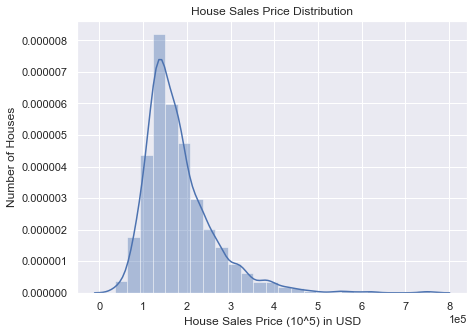

In [30]:
# let's visualize and see what the sale price distribution looks like
plt.figure(figsize=(7,5))
sns.distplot(train_data['SalePrice'],bins = 25)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,1))
plt.xlabel("House Sales Price (10^5) in USD")
plt.ylabel("Number of Houses")
plt.title("House Sales Price Distribution")

# the skewness and the kurtosis
print(f'Skewness : {train_data.SalePrice.skew()}')
print(f'Kurtosis : {train_data.SalePrice.kurt()}')

***We Know that Some Of the Features Are Numerical And Others Are Categorical So We Have Different Types Of Plots To Observe Their Behaviour in the Data***

### 1.) Numerical Features Relationship's

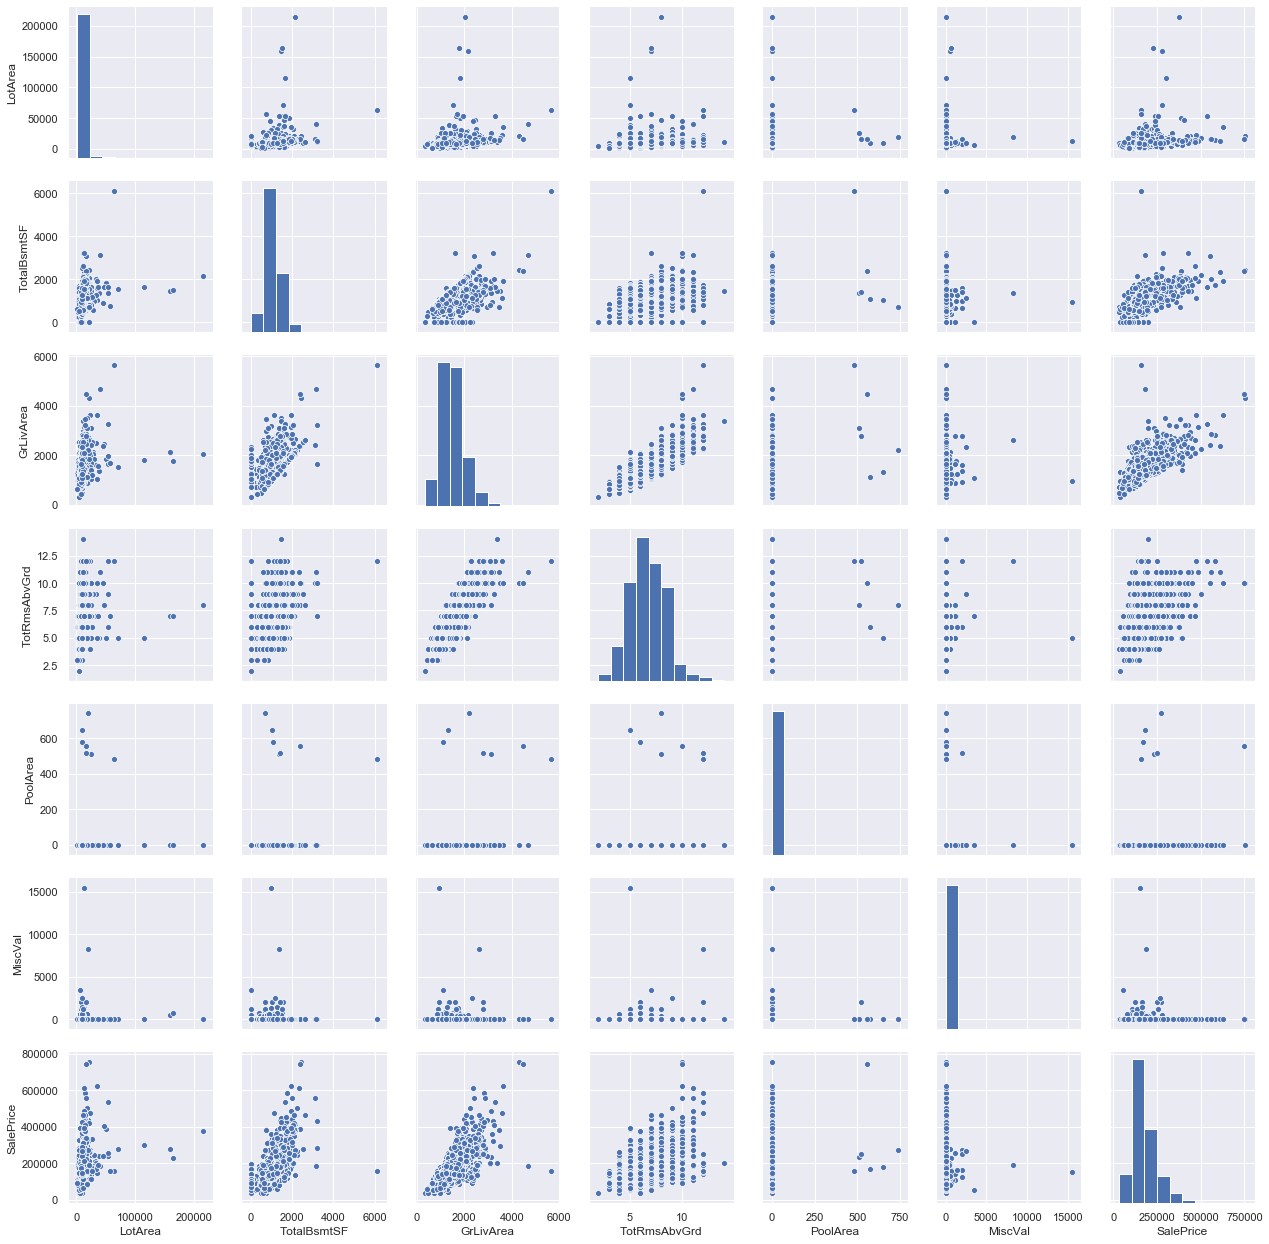

In [31]:
# pairplot
sns.set()
numerical_cols = ['LotArea','TotalBsmtSF','GrLivArea','TotRmsAbvGrd','PoolArea','MiscVal','SalePrice']
sns.pairplot(train_data[numerical_cols], height= 2.5)
plt.show()

* *we see that "**PoolArea**", "**MiscVal**" and "**LotArea**" have almost a constant relationship with SalePrice it means on increasing and decreasing the SalePrice these are not affected so we are gonna drop these features*

**NOTE: if we remove the outlier's from "LotArea" maybe it's relation will improve with the sale price you can do that I drop it because I observe when I am writing this so maybe you don't drop it rather you remove outliers and try it if results improve then let me know in the comment's**  

* *you see the "**TotalBsmtSF**", "**GrLivArea**" and "**TotRmsAbvGrd**" are positively increasing relationship with our hero "SalePrice" so our assumption about TotalBsmtSF and GrLivArea are right (Checked) but to make relation we have to remove the outliers you see that they suppress the relation so we treat them well in Feature engineering 

### 2.) Categorical Feature Analysis

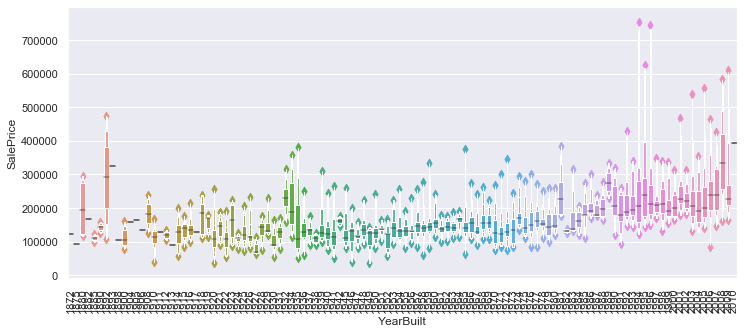

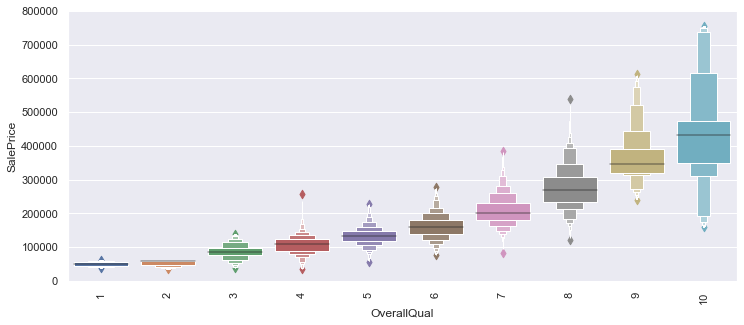

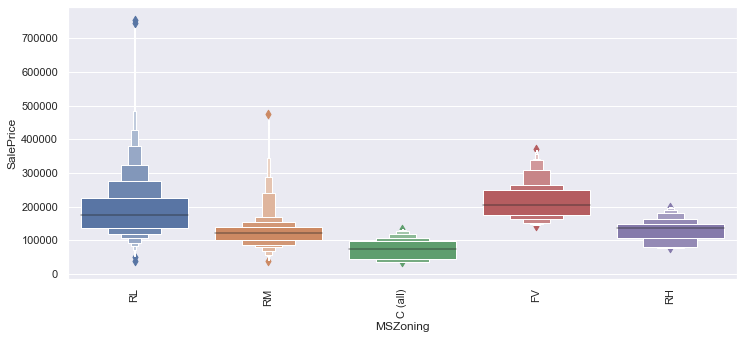

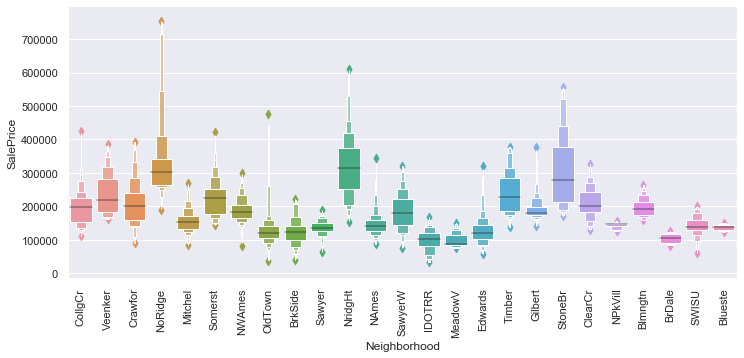

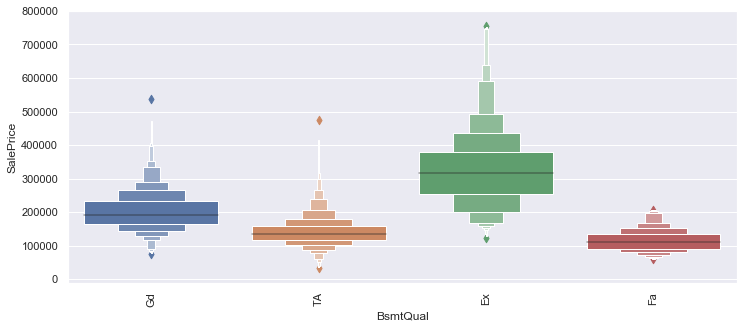

In [32]:
#boxplot
categorical_col = ['YearBuilt','OverallQual','MSZoning','Neighborhood','BsmtQual']

for col in categorical_col:
    f, ax = plt.subplots(figsize=(12, 5))
    sns.boxenplot(x=col, y='SalePrice', data = train_data)
    plt.xticks(rotation=90)
    plt.show()

* *you see "**OverallQual**" is positively increasing relationship with the "**SalePrice**"(second no. plot) so our theoretical assumption is right about OverallQual it affects the sale price (checked)*

### 3.) Correlation Analysis

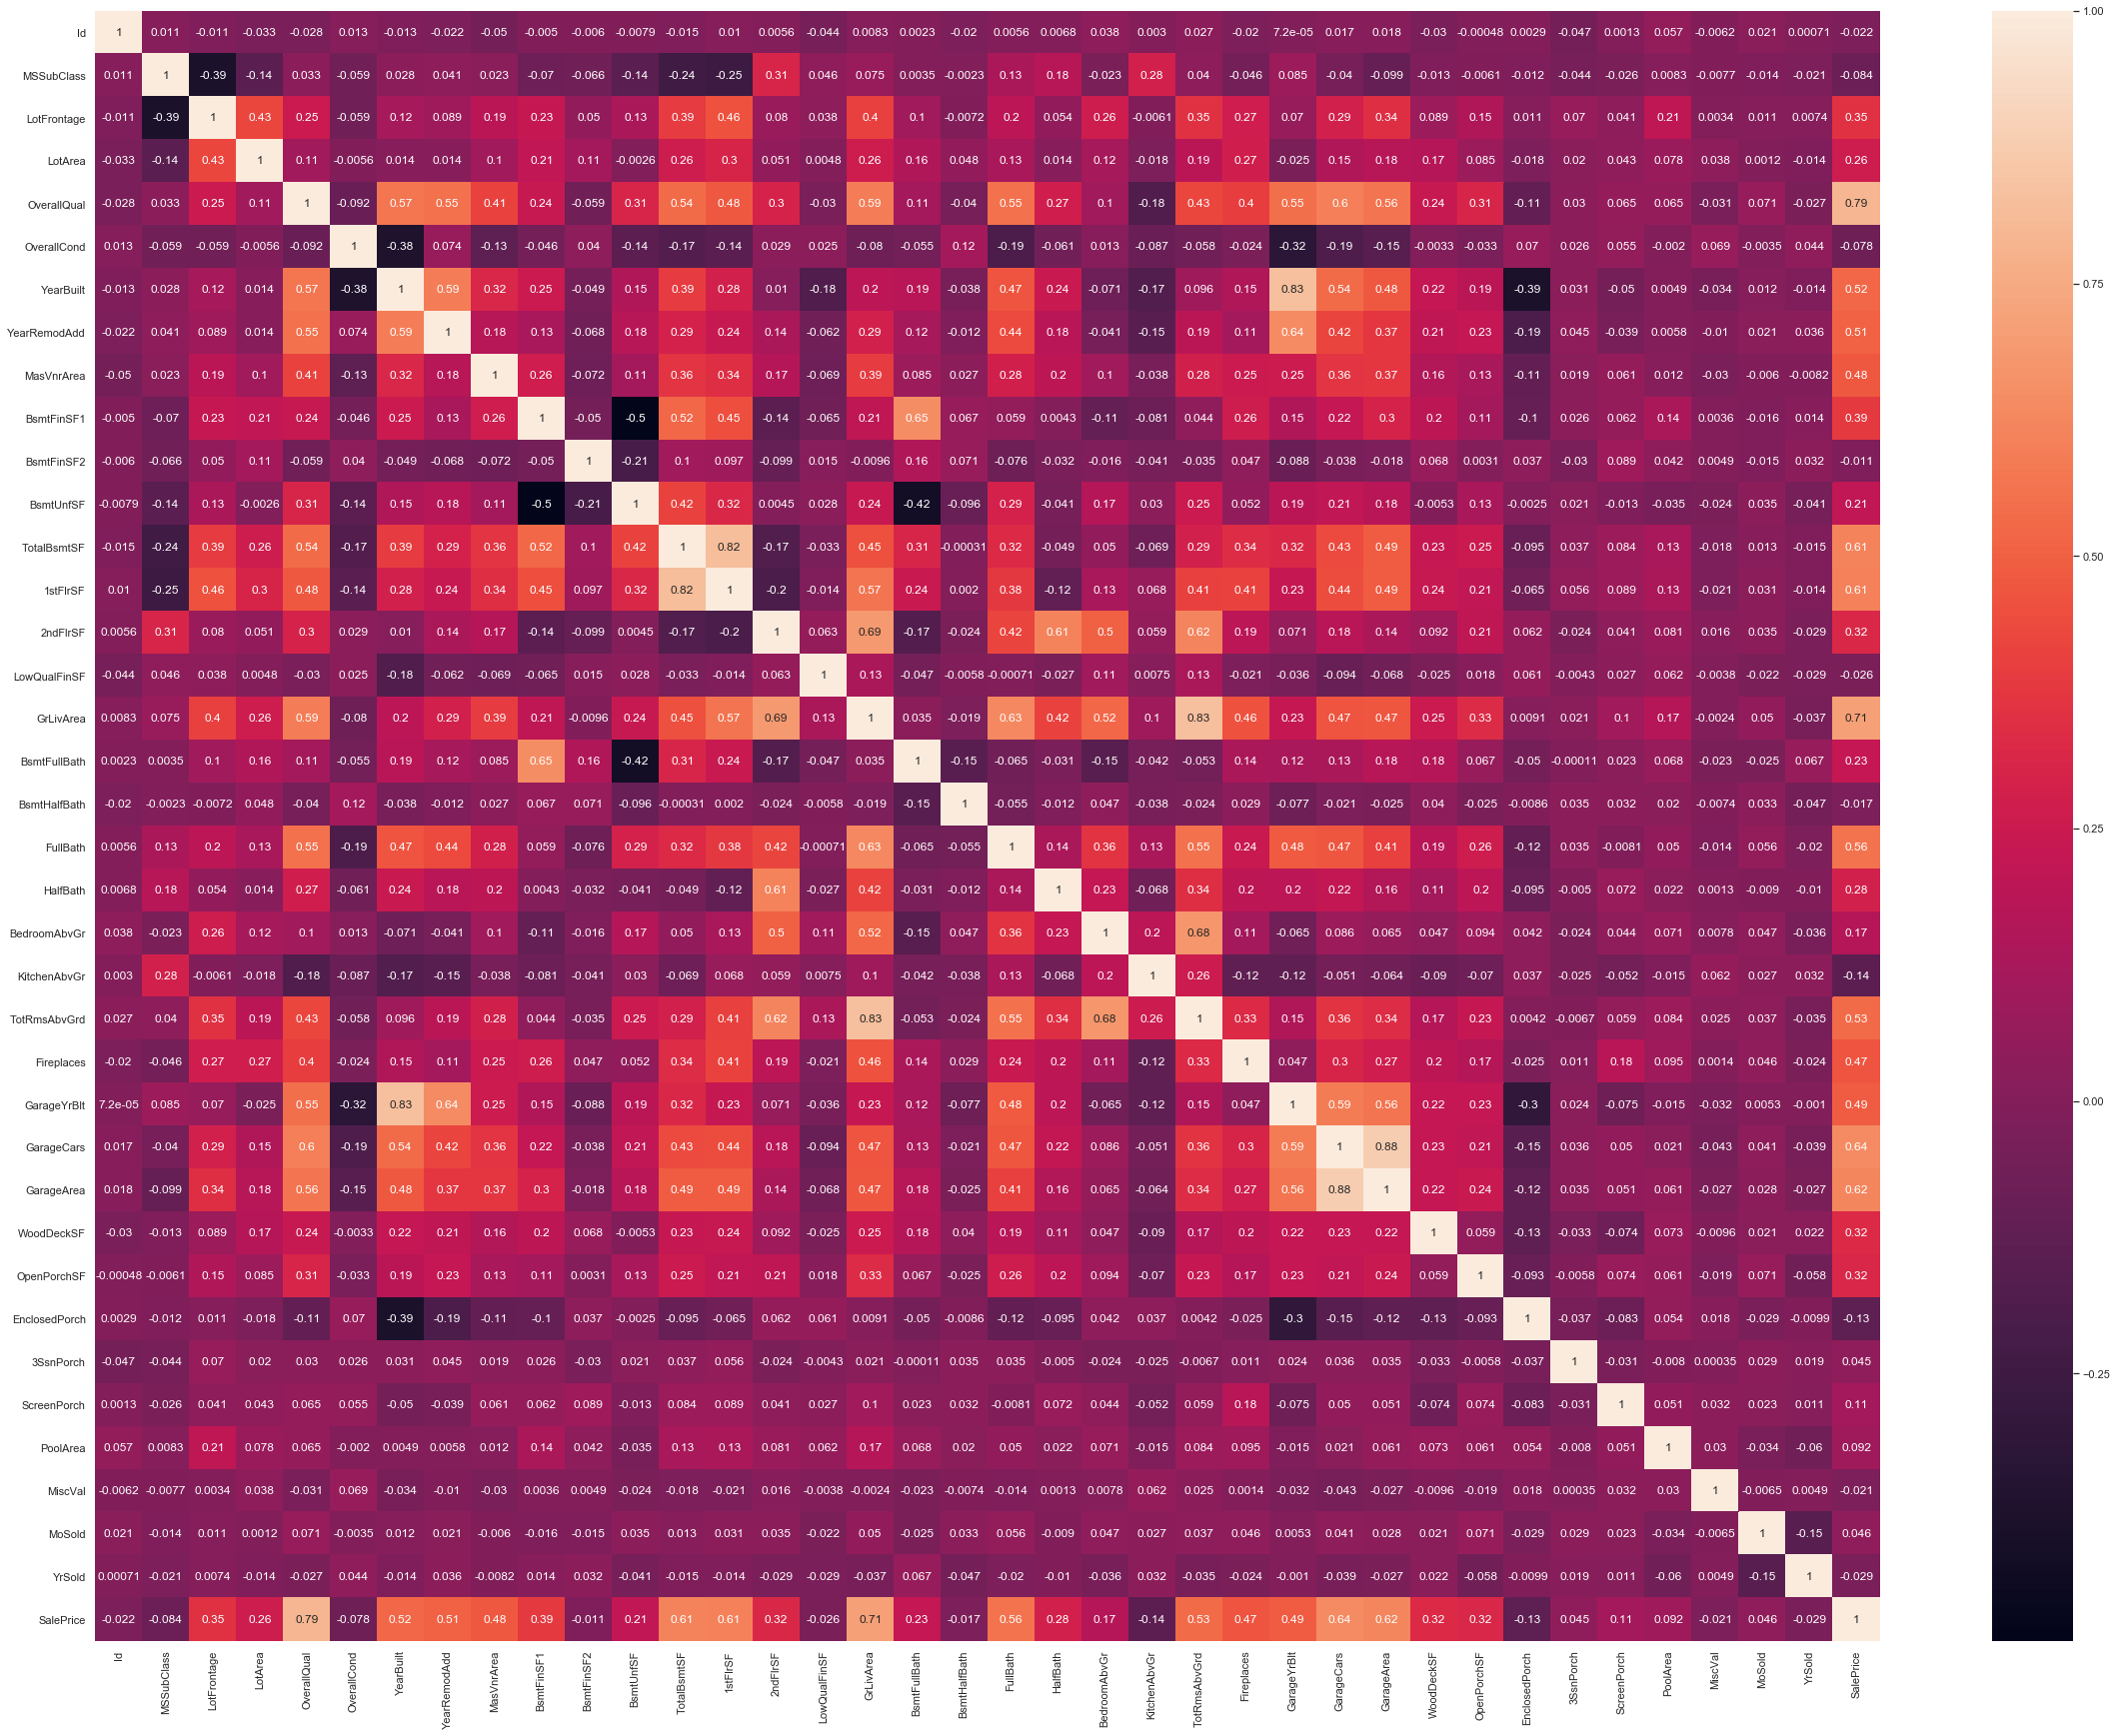

In [33]:
# correlation heatmap
corr = train_data.corr()
plt.figure(figsize = (40, 30))
sns.heatmap(corr, annot = True)
plt.show()

In this part of the movie we found out how the relations are between our hero (**SalePrice**) and other movie casts (**features**) or between one member of the cast and other members(**one feature with other features**) movie aside, we do this because if two features are highly correlated then the problem of **multicollinearity** arises so to avoid this we remove one of the features and kept one so, the interesting relations that we see here are

**Note: if two features are highly correlated then we kept the feature which is highly correlated with our SalePrice**

* "**GarageCars**"  and  "**GarageArea**" are highly correlated  and we  kept "GarageCars" the relation between them is high because you know more the area is then more cars we parked in Garage
* "**TotalBsmtSF**" and "**1stFlrSF**" are highly correlated and we kept TotalBsmtSF (you know the reason why)
* "**TotRmsAbvGrd**" and '**GrLivArea**" are highly correlated so we kept GrLivArea
* "**GarageYrBlt**" and "**YearBuilt**" are highly correlated so our theoretical assumption is right and the reason is simply that most of the garage is built with their house and we kept YearBuilt

### 4.) **Meet the villain Of Movie**

**OUTLIER'S**: In statistics, an outlier is an observation point that is distant from other observations. means they are separated from the crowd and contain special information that significantly affects the models so we have to detect and remove them
* **Detection of Outliers** -> there are two visualization methods two detect them 
    1. **BoxPlot** in this all the point outside the  **interquartile range (IQR)** are outliers
![](https://lsc.studysixsigma.com/wp-content/uploads/sites/6/2015/12/1435.png)    
    2. **scatterPlot** in this all the points separated from the **cluster** are the outliers
![](https://statistics.laerd.com/spss-tutorials/img/lr/outliers.png)    
    

* **Removing of Outliers** -> we simply remove that rows from the dataset that contain oultliar

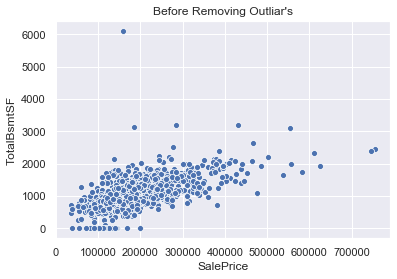

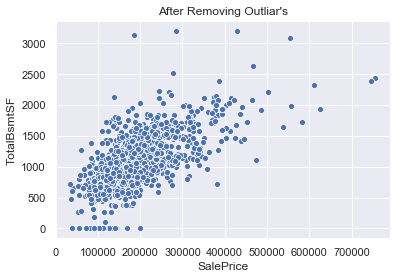

In [34]:
# scatter plot for outliar's detection
var = train_data['TotalBsmtSF']
sns.set()
sns.scatterplot(train_data['SalePrice'], var)
plt.title("Before Removing Outliar's")
plt.show()

# remove outliar from TotalBsmtSF
Indx = train_data[((train_data.TotalBsmtSF>5000))].index
train_data.drop(Indx,inplace=True)

# see weather outliar gone
var = train_data['TotalBsmtSF']
sns.set()
sns.scatterplot(train_data['SalePrice'], var)
plt.title("After Removing Outliar's")
plt.show()

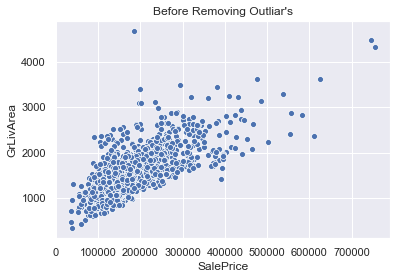

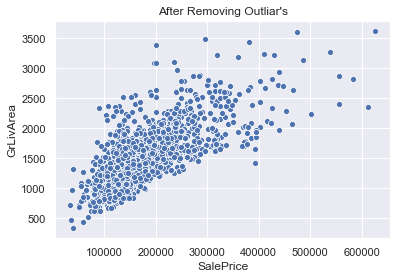

In [35]:
# scatter plot for outliar's detection
var = train_data['GrLivArea']
sns.set()
sns.scatterplot(train_data['SalePrice'], var)
plt.title("Before Removing Outliar's")
plt.show()

# remove outliar from GrLivArea
Index = train_data[((train_data.GrLivArea>4000))].index
for ind in Index:
    train_data.drop(ind, inplace=True)

# scatter plot for outliar's detection
var = train_data['GrLivArea']
sns.set()
sns.scatterplot(train_data['SalePrice'], var)
plt.title("After Removing Outliar's")
plt.show()

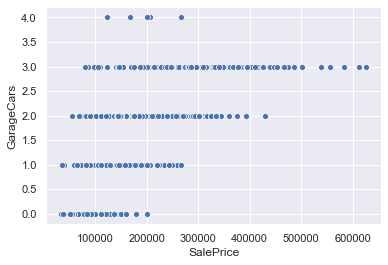

In [36]:
# scatter plot for outliar's detection
var = train_data['GarageCars']
sns.set()
sns.scatterplot(train_data['SalePrice'], var)
plt.show()

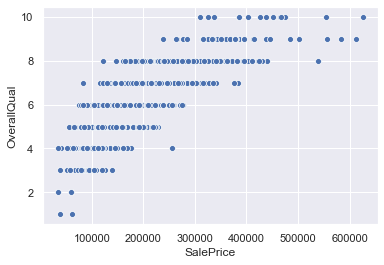

In [37]:
# scatter plot for outliar's detection
var = train_data['OverallQual']
sns.set()
sns.scatterplot(train_data['SalePrice'], var)
plt.show()

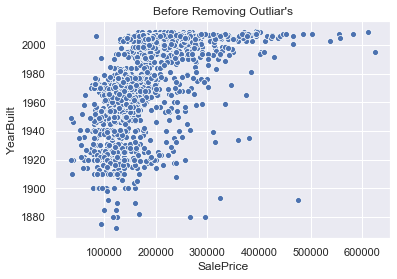

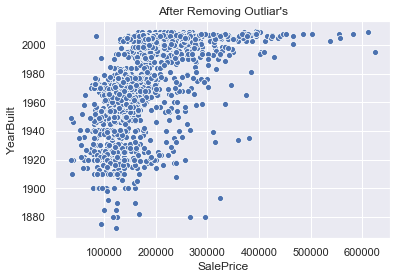

In [38]:
# scatter plot for outliar's detection
var = train_data['YearBuilt']
sns.set()
sns.scatterplot(train_data['SalePrice'], var)
plt.title("Before Removing Outliar's")
plt.show()

# remove outliar from YearBuilt
Indx = train_data[((train_data.SalePrice>400000)&(train_data.SalePrice<500000)&(train_data.YearBuilt<1900))].index
train_data.drop(Indx,inplace=True)

# scatter plot for outliar's detection
var = train_data['YearBuilt']
sns.set()
sns.scatterplot(train_data['SalePrice'], var)
plt.title("After Removing Outliar's")
plt.show()

# **STEP 2 : FEATURE ENGINEERING**

In [39]:
# split dependent and independent feature from dataset
x = train_data.iloc[:,0:80]
y = train_data.iloc[:,-1]

# combine train and test data
df = pd.concat([x,test_data],axis = 0)

# drop the Id colum from df
df = df.drop(['Id'], axis=1)

### A). **Drop the features selected from EDA**
**we remove those features which have very less correlation with the SalePrice or features that we don't consider them when we are going to  buy a house generally**

In [40]:
# dropping all the unnecessary features
drop_features = ['MSSubClass','OverallCond','BsmtFinType2','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','PoolArea','MiscVal','MoSold', 'YrSold','GarageArea',
                '1stFlrSF','TotRmsAbvGrd','GarageYrBlt','LotArea','Alley','LandContour','LandSlope','Heating','Electrical','BsmtExposure','BldgType',
                'Utilities','Functional']
df.drop(drop_features,axis=1,inplace=True)


### **B.) Handle Missing Data**

ATTENTION! -> this scene of the movie is most important because we have to be very careful we can't blindly  drop the features with a high percentage of missing values because in this problem if you read the description file of the data then you realize that some features like **Alley**, **BsmtQual**, and many others, etc. that they don't contain the missing value the "**NaN*" and "**None**" here don't represent the missing values they are categories means
* in **BsmtQual the NaN means No Basement in the house it's category not missing value similarly in Alley the NaN means no Alley in property it's a category**


there are many other features like these so in these features we don't do the deletion and imputation we simply remove NaN with a string like "Not in Property" so it became a category
and if features have real missing values then we either remove it or impute them depends on the percentage of values missing in them

In [41]:
# search for missing data
def missing_values(data):
    values = data.isnull().sum().sort_values(ascending = False)
    percentage = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    missing_df = pd.concat([values,percentage], axis=1, keys=['Values', 'Percentage%'])
    return missing_df

missing_df  = missing_values(df)
missing_df.head(25)

,Values,Percentage%
PoolQC,2906,99.725463
MiscFeature,2809,96.396706
Fence,2345,80.473576
FireplaceQu,1420,48.730268
LotFrontage,486,16.678106
GarageFinish,159,5.456417
GarageCond,159,5.456417
GarageQual,159,5.456417
GarageType,157,5.387783
BsmtCond,82,2.814001


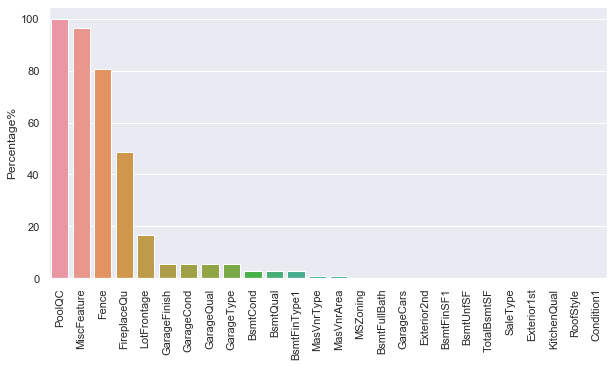

In [42]:
# plot the missing data
sns.set()
plt.figure(figsize = (10, 5))
sns.barplot(missing_df.index[0:26],missing_df['Percentage%'].head(26))
plt.xticks(rotation=90)
plt.show()

In [43]:
# remove the features with more than 50% missing data
df.drop([ 'PoolQC','MiscFeature','Fence','FireplaceQu'], axis=1, inplace=True)

# numerical column imputation
num_colums = ['LotFrontage','MasVnrArea','BsmtFullBath','BsmtFinSF1','TotalBsmtSF','BsmtUnfSF','GarageCars']
for col in num_colums:
    df[col].fillna(df[col].mean(), inplace = True)
    
# categorical column imputation
catg_colums = ['GarageCond','GarageFinish','GarageQual','GarageType','BsmtCond','BsmtQual','BsmtFinType1','MasVnrType','MSZoning','Exterior1st','Exterior2nd',
              'SaleType','KitchenQual']
for col in catg_colums:
    df[col].fillna(df[col].value_counts().index[0], inplace=True)

### **c.) Time For Vaccine**
you know at the beginning of the movie we see that our hero is born with some disabilities but during the movie, we realize that not only the hero but his buddies also suffer from disabilities so we use a vaccine called **log transformation** (many other vaccines are also out there like log1 you can also try that) first we run some test on our heroes and his buddies and then give them a vaccine and again run test to see whether disabilities were cured or not there are two visualizations that we use to observe the test results
* **Distribution Plot**: we observe the **skewness** and **kurtosis**
* **Probability Plot**:  **distribution of data**(the blue one) should closely follow the **diagonal line**(the red one) which represents the normal distribution

this treatment is called **NORMALIZATION**

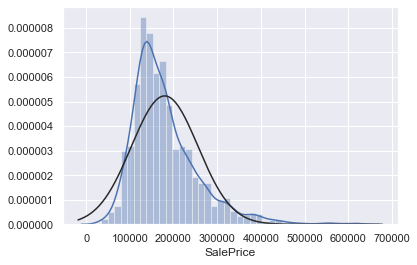

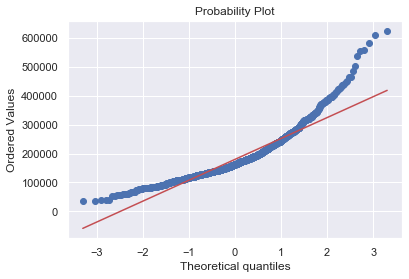

so we see that the SalePrice is show some positive skewness and peakedness also in probability plot we clearly see that it is deviate from it's diagnol line 
 but we can handle it by doing the log transformation, so let's see how it handle it


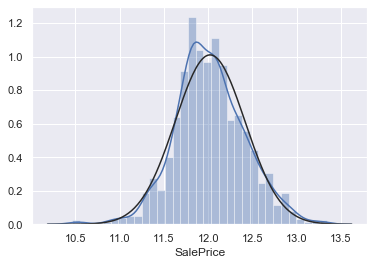

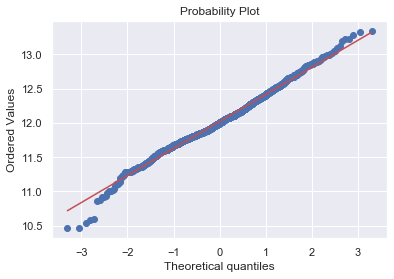

In [44]:
# normalize the target variable
from scipy import stats
from scipy.stats import norm

# visualize the taarget variable
sns.distplot(y, fit =norm);
fig = plt.figure()
prob = stats.probplot(y, plot = plt)
plt.show()

print("so we see that the SalePrice is show some positive skewness and peakedness also in probability plot we clearly see that it is deviate from it's diagnol line \n but we can handle it by doing the log transformation, so let's see how it handle it")

# apply log transformation
y = np.log(y)

# again visualize it
sns.distplot(y, fit =norm);
fig = plt.figure()
prob = stats.probplot(y, plot = plt)
plt.show()

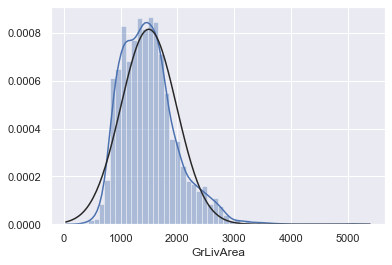

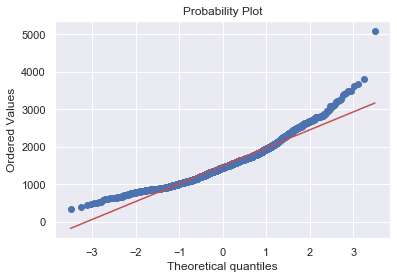

so we see that the GrLivArea is show some positive skewness and peakedness also in probability plot we clearly see that it is deviate from it's diagnol line 
 but we can handle it by doing the log transformation, so let's see how it handle it


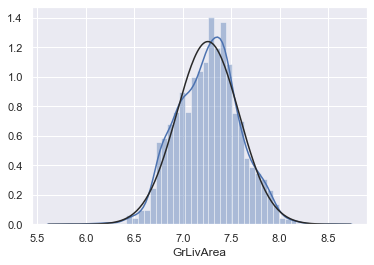

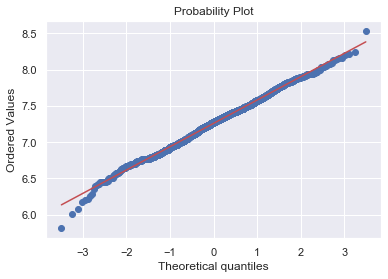

In [45]:
# normalize the GrLivArea
col = 'GrLivArea'
    
# visualize the taarget variable
sns.distplot(df[col], fit =norm);
fig = plt.figure()
prob = stats.probplot(df[col], plot = plt)
plt.show()

print("so we see that the GrLivArea is show some positive skewness and peakedness also in probability plot we clearly see that it is deviate from it's diagnol line \n but we can handle it by doing the log transformation, so let's see how it handle it")

# apply log transformation
df[col] = np.log(df[col])
    
# again visualize it
sns.distplot(df[col], fit =norm);
fig = plt.figure()
prob = stats.probplot(df[col], plot = plt)
plt.show()

### **D.) Handle Categorical Variable & Feature Scaling**

we have to convert the categorical features into the numerical features because we can't directly use them until and unless they are **Decision tree** or **forest algorithms** so we have to create **dummy variables** 
if a feature has two categories then it creates two dummy variables
![](https://www.analyticsvidhya.com/wp-content/uploads/2015/03/Dummy.png)

in the above example, you see that a categorical column name **gender** contains two categories (male and female) and it will be encoded in two different columns(**var_male and var_female**) which we called **dummy variables** (features) there are some techniques called **label encoding** 
and then **one-hot encoding** is used to encode the categorical features in dummy variables but pandas has a built-in function called **get_dummies** which we use here 

**Dummy variables:** variables containing values such as 1 or 0 representing the presence or absence of the categorical value.

**NOTE: you observe that here I pass an argument called "drop_first  = True"
it means if a categorical feature has two categories then it will encode in
two features but we drop one feature to avoid the dummy variable trap**

**Dummy varaiable trap:** a scenario in which the independent variables are multicollinear and we also say that two or more variables are highly correlated; in simple terms one variable can be predicted from the others.

In [46]:
# get dummy variables
df = pd.get_dummies(df, drop_first=True)
df.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,7,2003,2003,196.0,706.0,150.0,856.0,854,7.444249,...,0,0,0,0,1,0,0,0,1,0
1,80.0,6,1976,1976,0.0,978.0,284.0,1262.0,0,7.140453,...,0,0,0,0,1,0,0,0,1,0
2,68.0,7,2001,2002,162.0,486.0,434.0,920.0,866,7.487734,...,0,0,0,0,1,0,0,0,1,0
3,60.0,7,1915,1970,0.0,216.0,540.0,756.0,756,7.448334,...,0,0,0,0,1,0,0,0,0,0
4,84.0,8,2000,2000,350.0,655.0,490.0,1145.0,1053,7.695303,...,0,0,0,0,1,0,0,0,1,0


**feature scaling** -> we don't want that our hero is going to biased towards some bunch of friends (features) and ignore others huh... movie aside we do feature engineering to **scale down the features at the same scale** it is not necessary for all algorithms like **tree-based algorithms** didn't affect by unscaled features but on the other hands, **distance-based algorithms** (those algo's which calculate distances like **euclidian** in their background) are affected because they **give priority to the features that contain a high magnitude of numerical value over the features which have low magnitude numerical value.** there are two methods of feature scaling

* **Standardization**: in this, we scaled down the features such that **the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation** we use a function called **StandardScaler** which is present in **sklearn.preprocessing** library formula for Standardization
![](https://study.com/cimages/multimages/16/ZFormula.jpg)                                            
* **Normalization**:  in this, we scaled down the features in the range of  **(0, 1)** we use a function called **MinMaxScaler** which is also present in **sklearn.preprocessing** library formula for Normalization
![](https://beyondbacktesting.files.wordpress.com/2017/07/normalization.png)

**I suggest that You can always start by fitting your model to raw, normalized, and standardized data and compare the performance for best results.  here I use the only normalization but in my previous notebook, I will try this.**

**Note: I read somewhere that standardization is performed best for those algorithms which use gradient descent in their background** 

In [47]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
normal_df = pd.DataFrame(minmax.fit_transform(df))

# **STEP 3 : MODEL BUILDING**

In [48]:
# split the train and test data
train = normal_df.iloc[:1455,:].values
test = normal_df.iloc[1455:,:].values

In [49]:
# import all necessary libraries
from sklearn.linear_model import LinearRegression,BayesianRidge,Ridge,Lasso,HuberRegressor,ElasticNet
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error,make_scorer,r2_score
from sklearn.model_selection import RandomizedSearchCV

# DL libraries
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

Time taken to apply all Algorithms  69.70513916015625 Seconds


,R2 Scores
Ridge,9.004145e-01
Bayesian Ridge,9.003002e-01
CatBoost,8.990883e-01
Gradient Boost,8.881117e-01
Rndom Forest,8.660662e-01
SVR,8.632722e-01
AdaBoost,8.029055e-01
Hubber,6.495185e-01
Lasso,-4.988078e-03
Elatic-Net,-4.988078e-03


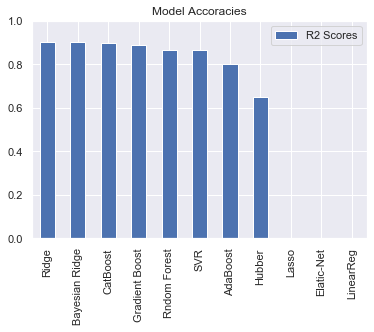

In [50]:
# apply multiple Algo
import time

def apply_algorithm(train,label):

    start_time = time.time()
    model_score = {} # list that contain the model scores
        
    # build the model and return error
    def model(reg):
        '''we will pass our regressor in this function and '''
        cross_val = KFold(n_splits=10 ,shuffle= True , random_state= 0)
        rmsle = make_scorer(r2_score)
        validation = cross_val_score(reg ,train, label, cv=cross_val, scoring=rmsle,n_jobs=-1)
        return validation.mean()
    
    # Linear Regression
    linearReg = LinearRegression()
    model_score['LinearReg'] = model(linearReg)
    
    # randomForest
    randForest = RandomForestRegressor(n_estimators=150,n_jobs=-1)
    model_score['Rndom Forest'] = model(randForest)
    
    # adboost
    adaboost = AdaBoostRegressor(n_estimators=100)
    model_score['AdaBoost'] = model(adaboost)
    
    # bayseian Ridge
    bayaeRidge = BayesianRidge()
    model_score['Bayesian Ridge'] = model(bayaeRidge)
    
    # Ridge
    ridge = Ridge()
    model_score['Ridge'] = model(ridge)
    
    # lasso
    lasso = Lasso()
    model_score['Lasso'] = model(lasso)
    
    # Hubber
    hubber = HuberRegressor()
    model_score['Hubber'] = model(hubber)
    
    # SVM
    svr = SVR()
    model_score['SVR'] = model(svr)
    
    # Elastic-net
    elastinet = ElasticNet()
    model_score['Elatic-Net'] = model(elastinet)
    
    # gradient boosting
    GDboost = GradientBoostingRegressor()
    model_score['Gradient Boost'] = model(GDboost)
    
    
    # CatBoost
    catboost = CatBoostRegressor()
    model_score['CatBoost'] = model(catboost)
    
    # visualize in Dataframe
    final_scores = pd.DataFrame.from_dict(model_score,orient='index')
    final_scores.columns = ['R2 Scores']
    final_scores = final_scores.sort_values('R2 Scores',ascending=False)
    
    # visualize in plots
    final_scores.plot(kind = 'bar',title = 'Model Accoracies')
    axes = plt.gca()
    axes.set_ylim([0 ,1])
    
    # time taken
    end_time = time.time()
    time_taken = end_time - start_time
    print(f'Time taken to apply all Algorithms  {time_taken} Seconds')
    
    return final_scores

apply_algorithm(train,y)

# **STEP 4 : STACKING - The climax of the movie**
stacking is also known as stack generalization in which a meta-model is trained from the pool of base model let see this how it works
* **STEP 1**: we have our train and test data split the train data in k-fold  using k-fold cross-validation, here k=3 so our train data splits into three parts
* **STEP 2**: we take our first base model and feed the train data the model will take the first twofold (part_1 and part_2) and predict for the third fold (part_3), similarly it will do a prediction for part_1 and part_2, the prediction from each fold will create a new feature for new training data.

![](https://miro.medium.com/max/1318/1*9uCwjY5uRkRrX2VNST7R0w.gif)

* **STEP 3**:  first base model then fitted to test data (without any folds), the predictions from test data are creating a new feature for new test data.
* **STEP 4**: step 2 and step 3 are repeated for every base model which is in our pool and they will create a whole new set of train and test dataset  
* **STEP 5**: now we trained our meta-model on new train data 
* **STEP 6**: final predictions on test data are made by the trained meta -model

![](https://cdn-images-1.medium.com/max/1600/0*GHYCJIjkkrP5ZgPh.png)

In [51]:
# initialize the base models

# apply hyperParameter optimization on ridge regressiom
parameters = {'alpha':[0.001,0.01,0.1,1,2,3,40,50,100,200, 230, 250,265, 270, 275, 290, 300, 500]}
ridge_1 = Ridge()

# apply randomized searchcv
randomSearch = RandomizedSearchCV(ridge_1, param_distributions=parameters, n_jobs=-1, cv=10)
randomSearch.fit(train,y)

# best parametrs 
bestpara = randomSearch.best_params_

# build the model and return error
def model(reg,train,label):
    '''we will pass our regressor in this function and '''
    cross_val = KFold(n_splits=10 ,shuffle= True , random_state= 0)
    rmsle = make_scorer(r2_score)
    validation = cross_val_score(reg ,train, label, cv=cross_val, scoring=rmsle,n_jobs=-1)
    return validation.mean()

# base model 1
model_1 = BayesianRidge()
score_1 = model(model_1,train,y)


# base model 2
model_2 = CatBoostRegressor()
score_2 = model(model_2,train,y)


# meta regressor
ridge = Ridge(alpha=1)
score = model(ridge,train,y)

# apply stacking 
''' Stack up models and optimize using Ridge'''
stack_model = StackingCVRegressor(regressors= (model_1,model_2), meta_regressor=ridge)
final_score = model(stack_model,train,y)
stack_gen = stack_model.fit(train,y)

Learning rate set to 0.0401
0:	learn: 0.3884713	total: 62ms	remaining: 1m 1s
1:	learn: 0.3791646	total: 69.6ms	remaining: 34.8s
2:	learn: 0.3688244	total: 77.8ms	remaining: 25.9s
3:	learn: 0.3595264	total: 85.6ms	remaining: 21.3s
4:	learn: 0.3504069	total: 93.3ms	remaining: 18.6s
5:	learn: 0.3417883	total: 102ms	remaining: 16.8s
6:	learn: 0.3328259	total: 110ms	remaining: 15.6s
7:	learn: 0.3248157	total: 117ms	remaining: 14.5s
8:	learn: 0.3172905	total: 124ms	remaining: 13.7s
9:	learn: 0.3096472	total: 132ms	remaining: 13.1s
10:	learn: 0.3033012	total: 141ms	remaining: 12.7s
11:	learn: 0.2962340	total: 149ms	remaining: 12.3s
12:	learn: 0.2897099	total: 157ms	remaining: 11.9s
13:	learn: 0.2837142	total: 166ms	remaining: 11.7s
14:	learn: 0.2772462	total: 174ms	remaining: 11.4s
15:	learn: 0.2715883	total: 181ms	remaining: 11.1s
16:	learn: 0.2661652	total: 189ms	remaining: 10.9s
17:	learn: 0.2610673	total: 197ms	remaining: 10.8s
18:	learn: 0.2564892	total: 206ms	remaining: 10.6s
19:	learn:

188:	learn: 0.1019365	total: 1.36s	remaining: 5.85s
189:	learn: 0.1017883	total: 1.37s	remaining: 5.84s
190:	learn: 0.1015805	total: 1.38s	remaining: 5.83s
191:	learn: 0.1015376	total: 1.38s	remaining: 5.82s
192:	learn: 0.1014038	total: 1.39s	remaining: 5.81s
193:	learn: 0.1012674	total: 1.4s	remaining: 5.8s
194:	learn: 0.1010852	total: 1.4s	remaining: 5.79s
195:	learn: 0.1008991	total: 1.41s	remaining: 5.78s
196:	learn: 0.1006871	total: 1.41s	remaining: 5.76s
197:	learn: 0.1005588	total: 1.42s	remaining: 5.76s
198:	learn: 0.1003640	total: 1.43s	remaining: 5.75s
199:	learn: 0.1002030	total: 1.43s	remaining: 5.73s
200:	learn: 0.1000491	total: 1.44s	remaining: 5.72s
201:	learn: 0.0998568	total: 1.44s	remaining: 5.7s
202:	learn: 0.0997645	total: 1.45s	remaining: 5.69s
203:	learn: 0.0996934	total: 1.45s	remaining: 5.67s
204:	learn: 0.0995619	total: 1.46s	remaining: 5.66s
205:	learn: 0.0994142	total: 1.47s	remaining: 5.65s
206:	learn: 0.0992889	total: 1.47s	remaining: 5.63s
207:	learn: 0.09

347:	learn: 0.0814888	total: 2.03s	remaining: 3.8s
348:	learn: 0.0814000	total: 2.03s	remaining: 3.79s
349:	learn: 0.0813829	total: 2.03s	remaining: 3.78s
350:	learn: 0.0812556	total: 2.04s	remaining: 3.77s
351:	learn: 0.0811698	total: 2.04s	remaining: 3.76s
352:	learn: 0.0810154	total: 2.04s	remaining: 3.75s
353:	learn: 0.0808792	total: 2.05s	remaining: 3.74s
354:	learn: 0.0807984	total: 2.05s	remaining: 3.73s
355:	learn: 0.0807330	total: 2.06s	remaining: 3.72s
356:	learn: 0.0806422	total: 2.06s	remaining: 3.71s
357:	learn: 0.0805461	total: 2.06s	remaining: 3.7s
358:	learn: 0.0804386	total: 2.07s	remaining: 3.69s
359:	learn: 0.0803090	total: 2.07s	remaining: 3.68s
360:	learn: 0.0801796	total: 2.07s	remaining: 3.67s
361:	learn: 0.0800241	total: 2.08s	remaining: 3.66s
362:	learn: 0.0799674	total: 2.08s	remaining: 3.65s
363:	learn: 0.0798540	total: 2.08s	remaining: 3.64s
364:	learn: 0.0797932	total: 2.08s	remaining: 3.63s
365:	learn: 0.0797024	total: 2.09s	remaining: 3.62s
366:	learn: 0.

550:	learn: 0.0648424	total: 2.69s	remaining: 2.19s
551:	learn: 0.0648038	total: 2.69s	remaining: 2.18s
552:	learn: 0.0647062	total: 2.69s	remaining: 2.18s
553:	learn: 0.0646987	total: 2.7s	remaining: 2.17s
554:	learn: 0.0646110	total: 2.7s	remaining: 2.17s
555:	learn: 0.0645073	total: 2.7s	remaining: 2.16s
556:	learn: 0.0644367	total: 2.71s	remaining: 2.15s
557:	learn: 0.0643713	total: 2.71s	remaining: 2.15s
558:	learn: 0.0642918	total: 2.71s	remaining: 2.14s
559:	learn: 0.0642859	total: 2.72s	remaining: 2.14s
560:	learn: 0.0642183	total: 2.72s	remaining: 2.13s
561:	learn: 0.0641531	total: 2.73s	remaining: 2.13s
562:	learn: 0.0640812	total: 2.73s	remaining: 2.12s
563:	learn: 0.0640745	total: 2.73s	remaining: 2.11s
564:	learn: 0.0640084	total: 2.74s	remaining: 2.11s
565:	learn: 0.0640026	total: 2.74s	remaining: 2.1s
566:	learn: 0.0638793	total: 2.74s	remaining: 2.09s
567:	learn: 0.0638202	total: 2.75s	remaining: 2.09s
568:	learn: 0.0637682	total: 2.75s	remaining: 2.08s
569:	learn: 0.06

712:	learn: 0.0549795	total: 3.18s	remaining: 1.28s
713:	learn: 0.0549262	total: 3.18s	remaining: 1.27s
714:	learn: 0.0548929	total: 3.18s	remaining: 1.27s
715:	learn: 0.0548895	total: 3.19s	remaining: 1.26s
716:	learn: 0.0548171	total: 3.19s	remaining: 1.26s
717:	learn: 0.0547682	total: 3.19s	remaining: 1.25s
718:	learn: 0.0547144	total: 3.2s	remaining: 1.25s
719:	learn: 0.0547075	total: 3.2s	remaining: 1.24s
720:	learn: 0.0546447	total: 3.2s	remaining: 1.24s
721:	learn: 0.0546410	total: 3.21s	remaining: 1.23s
722:	learn: 0.0545628	total: 3.21s	remaining: 1.23s
723:	learn: 0.0544811	total: 3.21s	remaining: 1.22s
724:	learn: 0.0544765	total: 3.21s	remaining: 1.22s
725:	learn: 0.0544722	total: 3.22s	remaining: 1.21s
726:	learn: 0.0543872	total: 3.22s	remaining: 1.21s
727:	learn: 0.0543054	total: 3.22s	remaining: 1.2s
728:	learn: 0.0542166	total: 3.23s	remaining: 1.2s
729:	learn: 0.0541435	total: 3.23s	remaining: 1.19s
730:	learn: 0.0540725	total: 3.23s	remaining: 1.19s
731:	learn: 0.054

875:	learn: 0.0476891	total: 3.67s	remaining: 519ms
876:	learn: 0.0476562	total: 3.67s	remaining: 515ms
877:	learn: 0.0475943	total: 3.67s	remaining: 510ms
878:	learn: 0.0475366	total: 3.68s	remaining: 506ms
879:	learn: 0.0474946	total: 3.68s	remaining: 502ms
880:	learn: 0.0474419	total: 3.68s	remaining: 498ms
881:	learn: 0.0474233	total: 3.69s	remaining: 493ms
882:	learn: 0.0473667	total: 3.69s	remaining: 489ms
883:	learn: 0.0473300	total: 3.69s	remaining: 485ms
884:	learn: 0.0472748	total: 3.7s	remaining: 481ms
885:	learn: 0.0472235	total: 3.7s	remaining: 476ms
886:	learn: 0.0471469	total: 3.7s	remaining: 472ms
887:	learn: 0.0470852	total: 3.71s	remaining: 468ms
888:	learn: 0.0470466	total: 3.71s	remaining: 463ms
889:	learn: 0.0470016	total: 3.71s	remaining: 459ms
890:	learn: 0.0469325	total: 3.72s	remaining: 455ms
891:	learn: 0.0469004	total: 3.72s	remaining: 451ms
892:	learn: 0.0468980	total: 3.72s	remaining: 446ms
893:	learn: 0.0468664	total: 3.73s	remaining: 442ms
894:	learn: 0.0

54:	learn: 0.1534916	total: 342ms	remaining: 5.87s
55:	learn: 0.1521588	total: 349ms	remaining: 5.89s
56:	learn: 0.1508282	total: 357ms	remaining: 5.9s
57:	learn: 0.1498937	total: 365ms	remaining: 5.93s
58:	learn: 0.1486371	total: 370ms	remaining: 5.91s
59:	learn: 0.1474298	total: 376ms	remaining: 5.89s
60:	learn: 0.1462583	total: 386ms	remaining: 5.94s
61:	learn: 0.1452075	total: 394ms	remaining: 5.95s
62:	learn: 0.1440289	total: 401ms	remaining: 5.96s
63:	learn: 0.1430058	total: 407ms	remaining: 5.95s
64:	learn: 0.1420905	total: 414ms	remaining: 5.96s
65:	learn: 0.1411723	total: 420ms	remaining: 5.95s
66:	learn: 0.1403725	total: 425ms	remaining: 5.92s
67:	learn: 0.1394822	total: 431ms	remaining: 5.91s
68:	learn: 0.1386495	total: 436ms	remaining: 5.89s
69:	learn: 0.1378651	total: 442ms	remaining: 5.87s
70:	learn: 0.1370888	total: 449ms	remaining: 5.88s
71:	learn: 0.1363822	total: 457ms	remaining: 5.89s
72:	learn: 0.1356747	total: 464ms	remaining: 5.89s
73:	learn: 0.1347790	total: 470m

249:	learn: 0.0930929	total: 1.34s	remaining: 4.01s
250:	learn: 0.0929166	total: 1.34s	remaining: 4.01s
251:	learn: 0.0927655	total: 1.35s	remaining: 4s
252:	learn: 0.0925992	total: 1.35s	remaining: 3.99s
253:	learn: 0.0924518	total: 1.35s	remaining: 3.98s
254:	learn: 0.0923533	total: 1.36s	remaining: 3.97s
255:	learn: 0.0922263	total: 1.36s	remaining: 3.96s
256:	learn: 0.0921203	total: 1.37s	remaining: 3.95s
257:	learn: 0.0920750	total: 1.37s	remaining: 3.94s
258:	learn: 0.0919362	total: 1.37s	remaining: 3.93s
259:	learn: 0.0918552	total: 1.38s	remaining: 3.92s
260:	learn: 0.0917437	total: 1.38s	remaining: 3.91s
261:	learn: 0.0915406	total: 1.39s	remaining: 3.9s
262:	learn: 0.0913749	total: 1.39s	remaining: 3.89s
263:	learn: 0.0912071	total: 1.39s	remaining: 3.88s
264:	learn: 0.0910594	total: 1.4s	remaining: 3.87s
265:	learn: 0.0909982	total: 1.4s	remaining: 3.87s
266:	learn: 0.0908395	total: 1.4s	remaining: 3.85s
267:	learn: 0.0907251	total: 1.41s	remaining: 3.85s
268:	learn: 0.09068

441:	learn: 0.0729798	total: 1.99s	remaining: 2.51s
442:	learn: 0.0729267	total: 1.99s	remaining: 2.5s
443:	learn: 0.0727867	total: 2s	remaining: 2.5s
444:	learn: 0.0727078	total: 2s	remaining: 2.49s
445:	learn: 0.0726736	total: 2s	remaining: 2.49s
446:	learn: 0.0725796	total: 2.01s	remaining: 2.48s
447:	learn: 0.0724765	total: 2.01s	remaining: 2.48s
448:	learn: 0.0723801	total: 2.01s	remaining: 2.47s
449:	learn: 0.0722721	total: 2.02s	remaining: 2.46s
450:	learn: 0.0722522	total: 2.02s	remaining: 2.46s
451:	learn: 0.0722329	total: 2.02s	remaining: 2.45s
452:	learn: 0.0721255	total: 2.02s	remaining: 2.44s
453:	learn: 0.0720368	total: 2.03s	remaining: 2.44s
454:	learn: 0.0719686	total: 2.03s	remaining: 2.43s
455:	learn: 0.0719005	total: 2.03s	remaining: 2.43s
456:	learn: 0.0718773	total: 2.04s	remaining: 2.42s
457:	learn: 0.0718263	total: 2.04s	remaining: 2.41s
458:	learn: 0.0718106	total: 2.04s	remaining: 2.41s
459:	learn: 0.0717210	total: 2.05s	remaining: 2.4s
460:	learn: 0.0716241	to

621:	learn: 0.0607105	total: 2.65s	remaining: 1.61s
622:	learn: 0.0606517	total: 2.65s	remaining: 1.6s
623:	learn: 0.0606450	total: 2.65s	remaining: 1.6s
624:	learn: 0.0605725	total: 2.66s	remaining: 1.59s
625:	learn: 0.0605412	total: 2.66s	remaining: 1.59s
626:	learn: 0.0604619	total: 2.67s	remaining: 1.58s
627:	learn: 0.0603482	total: 2.67s	remaining: 1.58s
628:	learn: 0.0603048	total: 2.67s	remaining: 1.57s
629:	learn: 0.0602224	total: 2.67s	remaining: 1.57s
630:	learn: 0.0601519	total: 2.68s	remaining: 1.57s
631:	learn: 0.0601000	total: 2.68s	remaining: 1.56s
632:	learn: 0.0600717	total: 2.68s	remaining: 1.56s
633:	learn: 0.0599671	total: 2.69s	remaining: 1.55s
634:	learn: 0.0599588	total: 2.69s	remaining: 1.55s
635:	learn: 0.0599276	total: 2.69s	remaining: 1.54s
636:	learn: 0.0598416	total: 2.7s	remaining: 1.54s
637:	learn: 0.0597550	total: 2.7s	remaining: 1.53s
638:	learn: 0.0597412	total: 2.7s	remaining: 1.53s
639:	learn: 0.0596769	total: 2.71s	remaining: 1.52s
640:	learn: 0.059

829:	learn: 0.0499724	total: 3.3s	remaining: 676ms
830:	learn: 0.0499255	total: 3.3s	remaining: 672ms
831:	learn: 0.0499193	total: 3.31s	remaining: 668ms
832:	learn: 0.0498862	total: 3.31s	remaining: 664ms
833:	learn: 0.0498413	total: 3.31s	remaining: 660ms
834:	learn: 0.0498372	total: 3.32s	remaining: 656ms
835:	learn: 0.0498149	total: 3.32s	remaining: 652ms
836:	learn: 0.0497858	total: 3.32s	remaining: 647ms
837:	learn: 0.0497706	total: 3.33s	remaining: 643ms
838:	learn: 0.0497651	total: 3.33s	remaining: 639ms
839:	learn: 0.0497113	total: 3.33s	remaining: 635ms
840:	learn: 0.0496462	total: 3.34s	remaining: 631ms
841:	learn: 0.0495443	total: 3.34s	remaining: 627ms
842:	learn: 0.0494885	total: 3.34s	remaining: 623ms
843:	learn: 0.0494628	total: 3.35s	remaining: 619ms
844:	learn: 0.0494383	total: 3.35s	remaining: 614ms
845:	learn: 0.0493830	total: 3.35s	remaining: 610ms
846:	learn: 0.0493096	total: 3.35s	remaining: 606ms
847:	learn: 0.0492730	total: 3.36s	remaining: 602ms
848:	learn: 0.

3:	learn: 0.3607004	total: 25.5ms	remaining: 6.35s
4:	learn: 0.3515752	total: 30.5ms	remaining: 6.06s
5:	learn: 0.3430727	total: 36.4ms	remaining: 6.03s
6:	learn: 0.3347216	total: 42.8ms	remaining: 6.07s
7:	learn: 0.3268652	total: 47.5ms	remaining: 5.88s
8:	learn: 0.3187238	total: 52.2ms	remaining: 5.75s
9:	learn: 0.3111989	total: 59.1ms	remaining: 5.85s
10:	learn: 0.3044906	total: 65.8ms	remaining: 5.92s
11:	learn: 0.2973864	total: 72ms	remaining: 5.93s
12:	learn: 0.2908715	total: 78.5ms	remaining: 5.96s
13:	learn: 0.2843301	total: 84.6ms	remaining: 5.96s
14:	learn: 0.2786502	total: 89.9ms	remaining: 5.91s
15:	learn: 0.2729312	total: 96ms	remaining: 5.91s
16:	learn: 0.2674638	total: 102ms	remaining: 5.9s
17:	learn: 0.2625321	total: 108ms	remaining: 5.89s
18:	learn: 0.2572787	total: 114ms	remaining: 5.86s
19:	learn: 0.2516317	total: 120ms	remaining: 5.86s
20:	learn: 0.2470020	total: 125ms	remaining: 5.84s
21:	learn: 0.2418696	total: 132ms	remaining: 5.85s
22:	learn: 0.2377437	total: 13

179:	learn: 0.1024027	total: 1.04s	remaining: 4.75s
180:	learn: 0.1022133	total: 1.05s	remaining: 4.74s
181:	learn: 0.1019548	total: 1.05s	remaining: 4.73s
182:	learn: 0.1018350	total: 1.06s	remaining: 4.73s
183:	learn: 0.1016029	total: 1.06s	remaining: 4.72s
184:	learn: 0.1014255	total: 1.07s	remaining: 4.72s
185:	learn: 0.1013828	total: 1.08s	remaining: 4.71s
186:	learn: 0.1013370	total: 1.08s	remaining: 4.7s
187:	learn: 0.1011316	total: 1.08s	remaining: 4.68s
188:	learn: 0.1009479	total: 1.09s	remaining: 4.66s
189:	learn: 0.1007297	total: 1.09s	remaining: 4.65s
190:	learn: 0.1005382	total: 1.09s	remaining: 4.63s
191:	learn: 0.1002858	total: 1.1s	remaining: 4.62s
192:	learn: 0.1000656	total: 1.1s	remaining: 4.6s
193:	learn: 0.0999079	total: 1.1s	remaining: 4.58s
194:	learn: 0.0997965	total: 1.1s	remaining: 4.57s
195:	learn: 0.0997434	total: 1.11s	remaining: 4.55s
196:	learn: 0.0996329	total: 1.11s	remaining: 4.53s
197:	learn: 0.0994563	total: 1.11s	remaining: 4.52s
198:	learn: 0.0993

357:	learn: 0.0815037	total: 1.7s	remaining: 3.05s
358:	learn: 0.0813692	total: 1.71s	remaining: 3.05s
359:	learn: 0.0812427	total: 1.71s	remaining: 3.04s
360:	learn: 0.0811621	total: 1.71s	remaining: 3.03s
361:	learn: 0.0810755	total: 1.72s	remaining: 3.03s
362:	learn: 0.0809676	total: 1.72s	remaining: 3.02s
363:	learn: 0.0808544	total: 1.73s	remaining: 3.02s
364:	learn: 0.0807138	total: 1.73s	remaining: 3.01s
365:	learn: 0.0807011	total: 1.73s	remaining: 3s
366:	learn: 0.0806883	total: 1.74s	remaining: 3s
367:	learn: 0.0805798	total: 1.74s	remaining: 2.99s
368:	learn: 0.0805011	total: 1.74s	remaining: 2.98s
369:	learn: 0.0804883	total: 1.75s	remaining: 2.97s
370:	learn: 0.0803754	total: 1.75s	remaining: 2.97s
371:	learn: 0.0803430	total: 1.75s	remaining: 2.96s
372:	learn: 0.0802533	total: 1.76s	remaining: 2.95s
373:	learn: 0.0801492	total: 1.76s	remaining: 2.95s
374:	learn: 0.0800248	total: 1.76s	remaining: 2.94s
375:	learn: 0.0798992	total: 1.77s	remaining: 2.93s
376:	learn: 0.07979

548:	learn: 0.0666452	total: 2.36s	remaining: 1.94s
549:	learn: 0.0665599	total: 2.37s	remaining: 1.94s
550:	learn: 0.0665421	total: 2.37s	remaining: 1.93s
551:	learn: 0.0664734	total: 2.37s	remaining: 1.93s
552:	learn: 0.0664061	total: 2.38s	remaining: 1.92s
553:	learn: 0.0663649	total: 2.38s	remaining: 1.92s
554:	learn: 0.0662791	total: 2.38s	remaining: 1.91s
555:	learn: 0.0662711	total: 2.39s	remaining: 1.91s
556:	learn: 0.0662423	total: 2.39s	remaining: 1.9s
557:	learn: 0.0661755	total: 2.4s	remaining: 1.9s
558:	learn: 0.0661210	total: 2.4s	remaining: 1.89s
559:	learn: 0.0661142	total: 2.4s	remaining: 1.89s
560:	learn: 0.0660303	total: 2.4s	remaining: 1.88s
561:	learn: 0.0659444	total: 2.41s	remaining: 1.88s
562:	learn: 0.0659378	total: 2.41s	remaining: 1.87s
563:	learn: 0.0658826	total: 2.42s	remaining: 1.87s
564:	learn: 0.0658758	total: 2.42s	remaining: 1.86s
565:	learn: 0.0658177	total: 2.42s	remaining: 1.86s
566:	learn: 0.0657955	total: 2.42s	remaining: 1.85s
567:	learn: 0.0657

738:	learn: 0.0568613	total: 3.02s	remaining: 1.07s
739:	learn: 0.0568274	total: 3.02s	remaining: 1.06s
740:	learn: 0.0567565	total: 3.03s	remaining: 1.06s
741:	learn: 0.0567272	total: 3.03s	remaining: 1.05s
742:	learn: 0.0566591	total: 3.03s	remaining: 1.05s
743:	learn: 0.0566503	total: 3.04s	remaining: 1.04s
744:	learn: 0.0565421	total: 3.04s	remaining: 1.04s
745:	learn: 0.0565195	total: 3.04s	remaining: 1.04s
746:	learn: 0.0565151	total: 3.05s	remaining: 1.03s
747:	learn: 0.0564450	total: 3.05s	remaining: 1.03s
748:	learn: 0.0564410	total: 3.06s	remaining: 1.02s
749:	learn: 0.0564227	total: 3.06s	remaining: 1.02s
750:	learn: 0.0563956	total: 3.06s	remaining: 1.01s
751:	learn: 0.0563152	total: 3.06s	remaining: 1.01s
752:	learn: 0.0562574	total: 3.07s	remaining: 1.01s
753:	learn: 0.0562259	total: 3.07s	remaining: 1s
754:	learn: 0.0561703	total: 3.08s	remaining: 998ms
755:	learn: 0.0560918	total: 3.08s	remaining: 994ms
756:	learn: 0.0560290	total: 3.08s	remaining: 989ms
757:	learn: 0.0

923:	learn: 0.0477284	total: 3.68s	remaining: 302ms
924:	learn: 0.0476848	total: 3.68s	remaining: 298ms
925:	learn: 0.0476395	total: 3.68s	remaining: 294ms
926:	learn: 0.0475417	total: 3.69s	remaining: 290ms
927:	learn: 0.0474894	total: 3.69s	remaining: 287ms
928:	learn: 0.0474679	total: 3.7s	remaining: 283ms
929:	learn: 0.0474202	total: 3.7s	remaining: 278ms
930:	learn: 0.0473825	total: 3.71s	remaining: 275ms
931:	learn: 0.0473499	total: 3.71s	remaining: 271ms
932:	learn: 0.0473078	total: 3.71s	remaining: 267ms
933:	learn: 0.0473006	total: 3.71s	remaining: 263ms
934:	learn: 0.0472346	total: 3.72s	remaining: 258ms
935:	learn: 0.0472057	total: 3.72s	remaining: 254ms
936:	learn: 0.0471725	total: 3.72s	remaining: 250ms
937:	learn: 0.0471353	total: 3.73s	remaining: 246ms
938:	learn: 0.0470993	total: 3.73s	remaining: 242ms
939:	learn: 0.0470505	total: 3.73s	remaining: 238ms
940:	learn: 0.0469998	total: 3.74s	remaining: 234ms
941:	learn: 0.0469427	total: 3.74s	remaining: 230ms
942:	learn: 0.

89:	learn: 0.1248372	total: 498ms	remaining: 5.04s
90:	learn: 0.1242567	total: 504ms	remaining: 5.04s
91:	learn: 0.1238769	total: 511ms	remaining: 5.04s
92:	learn: 0.1233733	total: 517ms	remaining: 5.05s
93:	learn: 0.1228601	total: 522ms	remaining: 5.03s
94:	learn: 0.1224724	total: 526ms	remaining: 5.01s
95:	learn: 0.1220650	total: 532ms	remaining: 5.01s
96:	learn: 0.1216324	total: 539ms	remaining: 5.01s
97:	learn: 0.1212322	total: 544ms	remaining: 5.01s
98:	learn: 0.1208610	total: 553ms	remaining: 5.03s
99:	learn: 0.1204160	total: 559ms	remaining: 5.03s
100:	learn: 0.1199969	total: 565ms	remaining: 5.03s
101:	learn: 0.1196542	total: 571ms	remaining: 5.03s
102:	learn: 0.1193231	total: 577ms	remaining: 5.02s
103:	learn: 0.1188707	total: 583ms	remaining: 5.02s
104:	learn: 0.1186408	total: 589ms	remaining: 5.02s
105:	learn: 0.1182244	total: 595ms	remaining: 5.02s
106:	learn: 0.1179241	total: 600ms	remaining: 5.01s
107:	learn: 0.1174558	total: 606ms	remaining: 5s
108:	learn: 0.1171278	tota

261:	learn: 0.0909533	total: 1.34s	remaining: 3.78s
262:	learn: 0.0907660	total: 1.34s	remaining: 3.77s
263:	learn: 0.0907284	total: 1.35s	remaining: 3.76s
264:	learn: 0.0906275	total: 1.35s	remaining: 3.75s
265:	learn: 0.0904715	total: 1.36s	remaining: 3.75s
266:	learn: 0.0903706	total: 1.36s	remaining: 3.74s
267:	learn: 0.0903282	total: 1.36s	remaining: 3.73s
268:	learn: 0.0902745	total: 1.37s	remaining: 3.72s
269:	learn: 0.0902398	total: 1.38s	remaining: 3.72s
270:	learn: 0.0900698	total: 1.38s	remaining: 3.72s
271:	learn: 0.0899373	total: 1.39s	remaining: 3.71s
272:	learn: 0.0898945	total: 1.39s	remaining: 3.71s
273:	learn: 0.0897639	total: 1.4s	remaining: 3.7s
274:	learn: 0.0896652	total: 1.4s	remaining: 3.69s
275:	learn: 0.0894882	total: 1.4s	remaining: 3.68s
276:	learn: 0.0893915	total: 1.41s	remaining: 3.68s
277:	learn: 0.0892668	total: 1.41s	remaining: 3.67s
278:	learn: 0.0891056	total: 1.42s	remaining: 3.66s
279:	learn: 0.0890120	total: 1.42s	remaining: 3.65s
280:	learn: 0.08

436:	learn: 0.0723062	total: 2s	remaining: 2.58s
437:	learn: 0.0722419	total: 2s	remaining: 2.57s
438:	learn: 0.0722194	total: 2.01s	remaining: 2.56s
439:	learn: 0.0721641	total: 2.01s	remaining: 2.56s
440:	learn: 0.0721157	total: 2.01s	remaining: 2.55s
441:	learn: 0.0720429	total: 2.02s	remaining: 2.55s
442:	learn: 0.0719522	total: 2.02s	remaining: 2.54s
443:	learn: 0.0718456	total: 2.03s	remaining: 2.54s
444:	learn: 0.0717441	total: 2.03s	remaining: 2.53s
445:	learn: 0.0716670	total: 2.03s	remaining: 2.53s
446:	learn: 0.0716051	total: 2.04s	remaining: 2.52s
447:	learn: 0.0715053	total: 2.04s	remaining: 2.52s
448:	learn: 0.0714913	total: 2.04s	remaining: 2.51s
449:	learn: 0.0714132	total: 2.05s	remaining: 2.5s
450:	learn: 0.0713133	total: 2.05s	remaining: 2.5s
451:	learn: 0.0711922	total: 2.06s	remaining: 2.49s
452:	learn: 0.0711009	total: 2.06s	remaining: 2.49s
453:	learn: 0.0710545	total: 2.06s	remaining: 2.48s
454:	learn: 0.0709969	total: 2.07s	remaining: 2.48s
455:	learn: 0.070921

632:	learn: 0.0592676	total: 2.66s	remaining: 1.54s
633:	learn: 0.0591898	total: 2.66s	remaining: 1.54s
634:	learn: 0.0591136	total: 2.67s	remaining: 1.53s
635:	learn: 0.0590482	total: 2.67s	remaining: 1.53s
636:	learn: 0.0589618	total: 2.67s	remaining: 1.52s
637:	learn: 0.0588756	total: 2.68s	remaining: 1.52s
638:	learn: 0.0587985	total: 2.68s	remaining: 1.51s
639:	learn: 0.0587598	total: 2.68s	remaining: 1.51s
640:	learn: 0.0587216	total: 2.69s	remaining: 1.5s
641:	learn: 0.0586651	total: 2.69s	remaining: 1.5s
642:	learn: 0.0585938	total: 2.7s	remaining: 1.5s
643:	learn: 0.0585237	total: 2.7s	remaining: 1.49s
644:	learn: 0.0585107	total: 2.7s	remaining: 1.49s
645:	learn: 0.0584081	total: 2.71s	remaining: 1.48s
646:	learn: 0.0583502	total: 2.71s	remaining: 1.48s
647:	learn: 0.0582328	total: 2.71s	remaining: 1.47s
648:	learn: 0.0581591	total: 2.72s	remaining: 1.47s
649:	learn: 0.0580953	total: 2.72s	remaining: 1.46s
650:	learn: 0.0580598	total: 2.72s	remaining: 1.46s
651:	learn: 0.0579

832:	learn: 0.0493986	total: 3.32s	remaining: 665ms
833:	learn: 0.0493273	total: 3.32s	remaining: 661ms
834:	learn: 0.0492850	total: 3.33s	remaining: 657ms
835:	learn: 0.0492257	total: 3.33s	remaining: 653ms
836:	learn: 0.0491946	total: 3.33s	remaining: 649ms
837:	learn: 0.0491254	total: 3.34s	remaining: 645ms
838:	learn: 0.0490783	total: 3.34s	remaining: 641ms
839:	learn: 0.0490325	total: 3.34s	remaining: 637ms
840:	learn: 0.0490037	total: 3.35s	remaining: 633ms
841:	learn: 0.0489482	total: 3.35s	remaining: 629ms
842:	learn: 0.0488802	total: 3.35s	remaining: 625ms
843:	learn: 0.0488369	total: 3.36s	remaining: 621ms
844:	learn: 0.0487845	total: 3.36s	remaining: 616ms
845:	learn: 0.0487529	total: 3.36s	remaining: 612ms
846:	learn: 0.0486953	total: 3.37s	remaining: 608ms
847:	learn: 0.0486706	total: 3.37s	remaining: 604ms
848:	learn: 0.0486674	total: 3.37s	remaining: 600ms
849:	learn: 0.0486191	total: 3.38s	remaining: 596ms
850:	learn: 0.0485766	total: 3.38s	remaining: 592ms
851:	learn: 

0:	learn: 0.3906859	total: 6.39ms	remaining: 6.39s
1:	learn: 0.3810551	total: 12.5ms	remaining: 6.25s
2:	learn: 0.3719439	total: 18.4ms	remaining: 6.12s
3:	learn: 0.3625464	total: 24.6ms	remaining: 6.13s
4:	learn: 0.3538571	total: 30.5ms	remaining: 6.07s
5:	learn: 0.3456787	total: 36.1ms	remaining: 5.98s
6:	learn: 0.3370467	total: 40.5ms	remaining: 5.74s
7:	learn: 0.3292433	total: 45.9ms	remaining: 5.69s
8:	learn: 0.3213730	total: 50.7ms	remaining: 5.58s
9:	learn: 0.3146273	total: 55.6ms	remaining: 5.51s
10:	learn: 0.3077327	total: 60.2ms	remaining: 5.41s
11:	learn: 0.3009005	total: 65.8ms	remaining: 5.42s
12:	learn: 0.2941261	total: 71.4ms	remaining: 5.42s
13:	learn: 0.2884500	total: 75.9ms	remaining: 5.35s
14:	learn: 0.2824364	total: 80.5ms	remaining: 5.29s
15:	learn: 0.2771603	total: 84.9ms	remaining: 5.22s
16:	learn: 0.2715646	total: 90.4ms	remaining: 5.23s
17:	learn: 0.2664141	total: 94.5ms	remaining: 5.16s
18:	learn: 0.2613597	total: 100ms	remaining: 5.17s
19:	learn: 0.2562993	to

175:	learn: 0.1070453	total: 832ms	remaining: 3.9s
176:	learn: 0.1067872	total: 837ms	remaining: 3.89s
177:	learn: 0.1066511	total: 842ms	remaining: 3.89s
178:	learn: 0.1064266	total: 846ms	remaining: 3.88s
179:	learn: 0.1062483	total: 851ms	remaining: 3.88s
180:	learn: 0.1060422	total: 857ms	remaining: 3.88s
181:	learn: 0.1058834	total: 862ms	remaining: 3.88s
182:	learn: 0.1058467	total: 868ms	remaining: 3.88s
183:	learn: 0.1056959	total: 873ms	remaining: 3.87s
184:	learn: 0.1054879	total: 877ms	remaining: 3.86s
185:	learn: 0.1054479	total: 882ms	remaining: 3.86s
186:	learn: 0.1053022	total: 886ms	remaining: 3.85s
187:	learn: 0.1051968	total: 891ms	remaining: 3.85s
188:	learn: 0.1050432	total: 897ms	remaining: 3.85s
189:	learn: 0.1048460	total: 903ms	remaining: 3.85s
190:	learn: 0.1046799	total: 907ms	remaining: 3.84s
191:	learn: 0.1045103	total: 912ms	remaining: 3.84s
192:	learn: 0.1043223	total: 916ms	remaining: 3.83s
193:	learn: 0.1040502	total: 920ms	remaining: 3.82s
194:	learn: 0

373:	learn: 0.0819252	total: 1.49s	remaining: 2.5s
374:	learn: 0.0818709	total: 1.49s	remaining: 2.49s
375:	learn: 0.0817389	total: 1.5s	remaining: 2.48s
376:	learn: 0.0816914	total: 1.5s	remaining: 2.48s
377:	learn: 0.0816681	total: 1.5s	remaining: 2.48s
378:	learn: 0.0815736	total: 1.51s	remaining: 2.47s
379:	learn: 0.0814486	total: 1.51s	remaining: 2.46s
380:	learn: 0.0813915	total: 1.51s	remaining: 2.46s
381:	learn: 0.0812820	total: 1.52s	remaining: 2.46s
382:	learn: 0.0811588	total: 1.52s	remaining: 2.45s
383:	learn: 0.0810898	total: 1.52s	remaining: 2.44s
384:	learn: 0.0809404	total: 1.53s	remaining: 2.44s
385:	learn: 0.0807753	total: 1.53s	remaining: 2.44s
386:	learn: 0.0806863	total: 1.53s	remaining: 2.43s
387:	learn: 0.0805262	total: 1.54s	remaining: 2.42s
388:	learn: 0.0804514	total: 1.54s	remaining: 2.42s
389:	learn: 0.0804152	total: 1.54s	remaining: 2.41s
390:	learn: 0.0802574	total: 1.54s	remaining: 2.41s
391:	learn: 0.0801299	total: 1.55s	remaining: 2.4s
392:	learn: 0.080

579:	learn: 0.0650241	total: 2.14s	remaining: 1.55s
580:	learn: 0.0649689	total: 2.15s	remaining: 1.55s
581:	learn: 0.0649094	total: 2.15s	remaining: 1.54s
582:	learn: 0.0648553	total: 2.15s	remaining: 1.54s
583:	learn: 0.0647595	total: 2.16s	remaining: 1.54s
584:	learn: 0.0646811	total: 2.16s	remaining: 1.53s
585:	learn: 0.0646021	total: 2.16s	remaining: 1.53s
586:	learn: 0.0644966	total: 2.17s	remaining: 1.52s
587:	learn: 0.0644880	total: 2.17s	remaining: 1.52s
588:	learn: 0.0644547	total: 2.17s	remaining: 1.52s
589:	learn: 0.0643932	total: 2.18s	remaining: 1.51s
590:	learn: 0.0643810	total: 2.18s	remaining: 1.51s
591:	learn: 0.0643240	total: 2.18s	remaining: 1.5s
592:	learn: 0.0642135	total: 2.19s	remaining: 1.5s
593:	learn: 0.0641728	total: 2.19s	remaining: 1.5s
594:	learn: 0.0641562	total: 2.19s	remaining: 1.49s
595:	learn: 0.0641152	total: 2.2s	remaining: 1.49s
596:	learn: 0.0640154	total: 2.2s	remaining: 1.49s
597:	learn: 0.0639856	total: 2.2s	remaining: 1.48s
598:	learn: 0.0639

740:	learn: 0.0563662	total: 2.63s	remaining: 920ms
741:	learn: 0.0562868	total: 2.64s	remaining: 917ms
742:	learn: 0.0562830	total: 2.64s	remaining: 913ms
743:	learn: 0.0562740	total: 2.64s	remaining: 909ms
744:	learn: 0.0562659	total: 2.65s	remaining: 906ms
745:	learn: 0.0561893	total: 2.65s	remaining: 902ms
746:	learn: 0.0561378	total: 2.65s	remaining: 898ms
747:	learn: 0.0560903	total: 2.65s	remaining: 895ms
748:	learn: 0.0560695	total: 2.66s	remaining: 891ms
749:	learn: 0.0560636	total: 2.66s	remaining: 888ms
750:	learn: 0.0560459	total: 2.67s	remaining: 884ms
751:	learn: 0.0559877	total: 2.67s	remaining: 880ms
752:	learn: 0.0559812	total: 2.67s	remaining: 877ms
753:	learn: 0.0559294	total: 2.68s	remaining: 873ms
754:	learn: 0.0559254	total: 2.68s	remaining: 869ms
755:	learn: 0.0559219	total: 2.68s	remaining: 866ms
756:	learn: 0.0558493	total: 2.68s	remaining: 862ms
757:	learn: 0.0557722	total: 2.69s	remaining: 858ms
758:	learn: 0.0557148	total: 2.69s	remaining: 854ms
759:	learn: 

902:	learn: 0.0492942	total: 3.12s	remaining: 335ms
903:	learn: 0.0492688	total: 3.12s	remaining: 332ms
904:	learn: 0.0491934	total: 3.13s	remaining: 328ms
905:	learn: 0.0491289	total: 3.13s	remaining: 325ms
906:	learn: 0.0490795	total: 3.13s	remaining: 321ms
907:	learn: 0.0490585	total: 3.13s	remaining: 318ms
908:	learn: 0.0490557	total: 3.14s	remaining: 314ms
909:	learn: 0.0489882	total: 3.14s	remaining: 311ms
910:	learn: 0.0489381	total: 3.14s	remaining: 307ms
911:	learn: 0.0488714	total: 3.15s	remaining: 304ms
912:	learn: 0.0488138	total: 3.15s	remaining: 300ms
913:	learn: 0.0488085	total: 3.15s	remaining: 297ms
914:	learn: 0.0487797	total: 3.16s	remaining: 293ms
915:	learn: 0.0487266	total: 3.16s	remaining: 290ms
916:	learn: 0.0487155	total: 3.16s	remaining: 286ms
917:	learn: 0.0486697	total: 3.17s	remaining: 283ms
918:	learn: 0.0486377	total: 3.17s	remaining: 279ms
919:	learn: 0.0485735	total: 3.17s	remaining: 276ms
920:	learn: 0.0484685	total: 3.17s	remaining: 272ms
921:	learn: 

100:	learn: 0.1215663	total: 320ms	remaining: 2.85s
101:	learn: 0.1211779	total: 323ms	remaining: 2.85s
102:	learn: 0.1208791	total: 327ms	remaining: 2.84s
103:	learn: 0.1205395	total: 330ms	remaining: 2.84s
104:	learn: 0.1202160	total: 334ms	remaining: 2.84s
105:	learn: 0.1198905	total: 337ms	remaining: 2.84s
106:	learn: 0.1195122	total: 341ms	remaining: 2.85s
107:	learn: 0.1192182	total: 344ms	remaining: 2.84s
108:	learn: 0.1188739	total: 347ms	remaining: 2.84s
109:	learn: 0.1187339	total: 350ms	remaining: 2.83s
110:	learn: 0.1184914	total: 353ms	remaining: 2.83s
111:	learn: 0.1182047	total: 357ms	remaining: 2.83s
112:	learn: 0.1180267	total: 360ms	remaining: 2.83s
113:	learn: 0.1177942	total: 363ms	remaining: 2.82s
114:	learn: 0.1175043	total: 366ms	remaining: 2.82s
115:	learn: 0.1172419	total: 369ms	remaining: 2.81s
116:	learn: 0.1168948	total: 373ms	remaining: 2.81s
117:	learn: 0.1166016	total: 376ms	remaining: 2.81s
118:	learn: 0.1163416	total: 379ms	remaining: 2.8s
119:	learn: 0

301:	learn: 0.0895409	total: 976ms	remaining: 2.25s
302:	learn: 0.0894242	total: 979ms	remaining: 2.25s
303:	learn: 0.0892832	total: 983ms	remaining: 2.25s
304:	learn: 0.0892550	total: 986ms	remaining: 2.25s
305:	learn: 0.0891506	total: 990ms	remaining: 2.24s
306:	learn: 0.0890303	total: 993ms	remaining: 2.24s
307:	learn: 0.0889045	total: 997ms	remaining: 2.24s
308:	learn: 0.0888032	total: 1s	remaining: 2.24s
309:	learn: 0.0886883	total: 1s	remaining: 2.23s
310:	learn: 0.0886202	total: 1.01s	remaining: 2.23s
311:	learn: 0.0885040	total: 1.01s	remaining: 2.23s
312:	learn: 0.0883899	total: 1.01s	remaining: 2.23s
313:	learn: 0.0882491	total: 1.02s	remaining: 2.23s
314:	learn: 0.0881296	total: 1.02s	remaining: 2.22s
315:	learn: 0.0880134	total: 1.02s	remaining: 2.22s
316:	learn: 0.0879071	total: 1.03s	remaining: 2.22s
317:	learn: 0.0878629	total: 1.03s	remaining: 2.21s
318:	learn: 0.0877427	total: 1.03s	remaining: 2.21s
319:	learn: 0.0876354	total: 1.04s	remaining: 2.21s
320:	learn: 0.0874

508:	learn: 0.0716953	total: 1.63s	remaining: 1.58s
509:	learn: 0.0716107	total: 1.64s	remaining: 1.57s
510:	learn: 0.0715160	total: 1.64s	remaining: 1.57s
511:	learn: 0.0714486	total: 1.64s	remaining: 1.57s
512:	learn: 0.0713424	total: 1.65s	remaining: 1.56s
513:	learn: 0.0713150	total: 1.65s	remaining: 1.56s
514:	learn: 0.0712290	total: 1.66s	remaining: 1.56s
515:	learn: 0.0711983	total: 1.66s	remaining: 1.55s
516:	learn: 0.0711144	total: 1.66s	remaining: 1.55s
517:	learn: 0.0710306	total: 1.66s	remaining: 1.55s
518:	learn: 0.0709722	total: 1.67s	remaining: 1.54s
519:	learn: 0.0709343	total: 1.67s	remaining: 1.54s
520:	learn: 0.0708693	total: 1.67s	remaining: 1.54s
521:	learn: 0.0707900	total: 1.68s	remaining: 1.54s
522:	learn: 0.0707772	total: 1.68s	remaining: 1.53s
523:	learn: 0.0706911	total: 1.68s	remaining: 1.53s
524:	learn: 0.0706805	total: 1.69s	remaining: 1.53s
525:	learn: 0.0706151	total: 1.69s	remaining: 1.52s
526:	learn: 0.0705130	total: 1.69s	remaining: 1.52s
527:	learn: 

716:	learn: 0.0599936	total: 2.29s	remaining: 903ms
717:	learn: 0.0599802	total: 2.29s	remaining: 900ms
718:	learn: 0.0599383	total: 2.29s	remaining: 897ms
719:	learn: 0.0598785	total: 2.3s	remaining: 894ms
720:	learn: 0.0598044	total: 2.3s	remaining: 891ms
721:	learn: 0.0597446	total: 2.31s	remaining: 888ms
722:	learn: 0.0596688	total: 2.31s	remaining: 885ms
723:	learn: 0.0596645	total: 2.31s	remaining: 882ms
724:	learn: 0.0596528	total: 2.32s	remaining: 879ms
725:	learn: 0.0595937	total: 2.32s	remaining: 876ms
726:	learn: 0.0595765	total: 2.32s	remaining: 873ms
727:	learn: 0.0595504	total: 2.33s	remaining: 870ms
728:	learn: 0.0594934	total: 2.33s	remaining: 867ms
729:	learn: 0.0594762	total: 2.33s	remaining: 863ms
730:	learn: 0.0594711	total: 2.34s	remaining: 860ms
731:	learn: 0.0594662	total: 2.34s	remaining: 857ms
732:	learn: 0.0594035	total: 2.34s	remaining: 853ms
733:	learn: 0.0593979	total: 2.35s	remaining: 850ms
734:	learn: 0.0593426	total: 2.35s	remaining: 847ms
735:	learn: 0.

918:	learn: 0.0515577	total: 2.94s	remaining: 260ms
919:	learn: 0.0515121	total: 2.95s	remaining: 256ms
920:	learn: 0.0514813	total: 2.95s	remaining: 253ms
921:	learn: 0.0514115	total: 2.95s	remaining: 250ms
922:	learn: 0.0513976	total: 2.96s	remaining: 247ms
923:	learn: 0.0513777	total: 2.96s	remaining: 244ms
924:	learn: 0.0513626	total: 2.96s	remaining: 240ms
925:	learn: 0.0513057	total: 2.97s	remaining: 237ms
926:	learn: 0.0512917	total: 2.97s	remaining: 234ms
927:	learn: 0.0512475	total: 2.98s	remaining: 231ms
928:	learn: 0.0511852	total: 2.98s	remaining: 228ms
929:	learn: 0.0511265	total: 2.98s	remaining: 225ms
930:	learn: 0.0510626	total: 2.99s	remaining: 221ms
931:	learn: 0.0509995	total: 2.99s	remaining: 218ms
932:	learn: 0.0509425	total: 2.99s	remaining: 215ms
933:	learn: 0.0508885	total: 3s	remaining: 212ms
934:	learn: 0.0508846	total: 3s	remaining: 209ms
935:	learn: 0.0508457	total: 3s	remaining: 205ms
936:	learn: 0.0508088	total: 3.01s	remaining: 202ms
937:	learn: 0.0507691

In [52]:
# accuracies
print('Bayesian Ridge Accuracy = {0:.2f}%'.format(score_1*100))
print('CatBoost Accuracy = {0:.2f}%'.format(score_2*100))
print('Ridge Accuracy = {0:.2f}%'.format(score*100))
print('Stack Accuracy = {0:.2f}%'.format(final_score*100))

Bayesian Ridge Accuracy = 90.03%
CatBoost Accuracy = 89.91%
Ridge Accuracy = 90.04%
Stack Accuracy = 90.69%


In [54]:
# predict the scores
test_pred = stack_gen.predict(test)
submission = pd.read_csv('C:\\Users\\csvya\\Git_Hub_Repos\\sample_submission.csv')
submission['SalePrice'] = np.floor(np.expm1(test_pred)) # inversing and flooring log scaled saleprice to see orignal prediction
submission = submission[['Id', 'SalePrice']]

# create submission file
submission.to_csv('blend_submission.csv',index=False)
print('submission file is created')

submission file is created


# **Conclusion And Acknowledgements**
we reached the end of our exercise, I think this is a great dataset for beginners to learn new methods and techniques I hope you like the notebooks and feel free to give any suggestions regarding this notebook thanks to the **Kaggle community** and special thanks to 
* [Pedro Marcelino](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python#COMPREHENSIVE-DATA-EXPLORATION-WITH-PYTHON) : Comprehensive data exploration with Python
* [Lavanya Shukla](https://www.kaggle.com/lavanyashukla01/how-i-made-top-0-3-on-a-kaggle-competition) : How I made top 0.3% on a Kaggle competition